In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBRFClassifier

In [19]:
df = pd.read_csv('/content/drive/MyDrive/ids_project/creditcard.csv')

In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
def under_sampler(input, target_col):
  
  # initialize the ClusterCentroid sampler & undersample the input
  cc_under_sampler = ClusterCentroids(sampling_strategy='not minority', random_state=9)
  x_us, y_us = cc_under_sampler.fit_resample(X=input.loc[:,input.columns != target_col], y=input[target_col])

  return x_us, y_us

In [37]:
def over_sampler(input, target_col):

  # initialize SMOTE and oversample the input data
  smote_over_sampler = SMOTE()
  x_os, y_os = smote_over_sampler.fit_resample(X=input.loc[:,input.columns != target_col], y=input[target_col])

  return x_os, y_os

In [26]:
def print_metrics(y_test, y_pred):
  # plotting the confusion matrix
  plt.figure(figsize=(8, 8))
  plt.title('Confusion Matrix')

  conf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_matrix, annot=True, xticklabels=["fraud", "non-fraud"], yticklabels=["fraud", "non-fraud"])

  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  # metrcis
  print("")
  print("Accuracy  :", accuracy_score(y_test, y_pred))
  print("Recall    :", recall_score(y_test, y_pred))
  print("Precision :", precision_score(y_test, y_pred))
  print("F1-score  :", f1_score(y_test, y_pred))
  print("ROC AUC   :", roc_auc_score(y_test, y_pred))

In [53]:
def randrom_forest_classifier(input_df):
  
  # Random forest with under sampled data
  print("Random Forest with undersampled data:\n")

  # Initalize random forest classifier
  rf_classifier_us = RandomForestClassifier(n_jobs=-1)

  # undersample the input
  x_us, y_us = under_sampler(input_df, 'Class')

  # train-test split
  X_train, X_test, y_train, y_test = train_test_split(x_us, y_us, test_size=0.3)

  rkf = RepeatedKFold()
  cv_scores = cross_validate(rf_classifier_us, X_train, y_train, cv=rkf.split(X_train, y_train), scoring=['accuracy', 'roc_auc'])

  # fit
  model_us = rf_classifier_us.fit(X_train, y_train)

  # predict 
  y_pred = model_us.predict(X_test)

  # metrcis
  print_metrics(y_test, y_pred)
  print("\n")
  print("---------------------------------------------------------------------")
  print("\n")

  # Random Forest on oversampled data
  print("Random Forest with oversampled data:\n")
  
  # Initalize random forest classifier
  rf_classifier_os = RandomForestClassifier(n_jobs=-1)

  # oversampling
  x_os, y_os = over_sampler(input_df, 'Class')

  # train-test split
  X_train, X_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3)

  # cross validation
  cv_scores = cross_val_score(rf_classifier_os, X_train, y_train)

  # fit
  model_os = rf_classifier_os.fit(X_train, y_train)

  # predict 
  y_pred = model_os.predict(X_test)

  # scores 
  print_metrics(y_test, y_pred)

Random Forest with undersampled data:



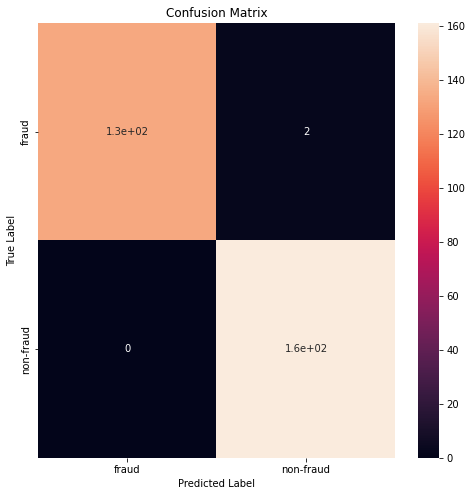


Accuracy  : 0.9932432432432432
Recall    : 1.0
Precision : 0.9877300613496932
F1-score  : 0.9938271604938271
ROC AUC   : 0.9925925925925926


---------------------------------------------------------------------


Random Forest with oversampled data:



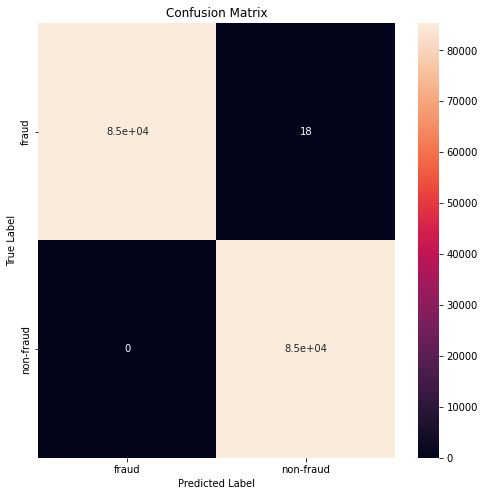


Accuracy  : 0.9998944832316269
Recall    : 1.0
Precision : 0.9997887819760619
F1-score  : 0.9998943798335896
ROC AUC   : 0.9998945975382669


In [54]:
randrom_forest_classifier(df)

**Standalone Random Forest With XGBoost**

In [32]:
#
# XGBoost Classifier with unbalanced data
# 'scale_pos_weight' hyper-parameter is used to balance internallly
#
def xgboost_pure(df):

  # initialize classifier 
  xgb_clsf = XGBRFClassifier(
                          n_estimators=100,
                          num_parallel_tree=1,
                          verbosity=1,
                          subsample=0.8,
                          colsample_bynode=0.8,
                          random_state=78,
                          objective='binary:logistic',
                          early_stopping_rounds=3,
                          eval_metric=['error']
                        )
  # train-test split
  X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Class'], df['Class'], test_size=0.3)

  # train-val split for early stopping
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

  #fit 
  xgb_clsf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

  #predict
  y_pred = xgb_clsf.predict(X_test)

  # print metrics
  print_metrics(y_test, y_pred)

Exception ignored in: <function Booster.__del__ at 0x7f39f8c23e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


[0]	validation_0-error:0.000702


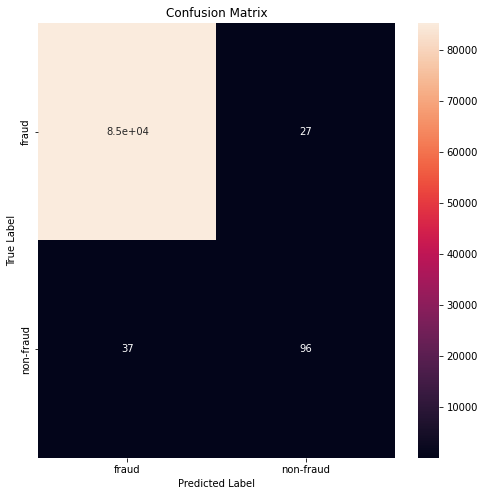


Accuracy  : 0.9992509626300574
Recall    : 0.7218045112781954
Precision : 0.7804878048780488
F1-score  : 0.75
ROC AUC   : 0.860744009243599


In [33]:
# XGBoost with imbalanced data
xgboost_pure(df)

In [38]:
def xgboost_on_undersample(input_df):
  
  # initialize classifier 
  xgb_clsf = XGBRFClassifier(
                          n_estimators=100,
                          num_parallel_tree=1,
                          verbosity=1,
                          subsample=0.8,
                          colsample_bynode=0.8,
                          random_state=78,
                          objective='binary:logistic',
                          early_stopping_rounds=3,
                          eval_metric=['error']
                        )
  
  # undersample the input
  x_us, y_us = under_sampler(input_df, 'Class')

  # train-test split
  X_train, X_test, y_train, y_test = train_test_split(x_us, y_us, test_size=0.3)
  # train-val split for early stopping
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

  #fit 
  xgb_clsf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

  # predict
  y_pred = xgb_clsf.predict(X_test)

  # print metrics
  print_metrics(y_test, y_pred)

[0]	validation_0-error:0.007246


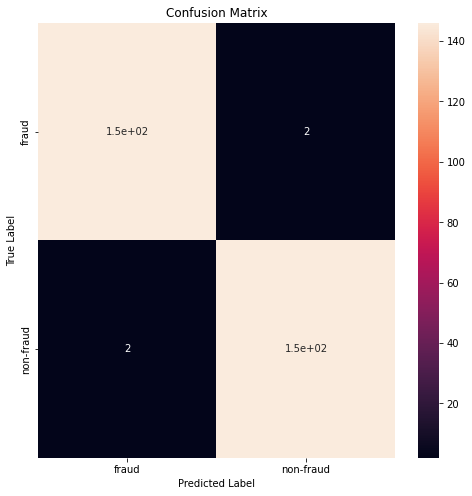


Accuracy  : 0.9864864864864865
Recall    : 0.9864864864864865
Precision : 0.9864864864864865
F1-score  : 0.9864864864864865
ROC AUC   : 0.9864864864864865


In [39]:
# XGBoost after under sampling
xgboost_on_undersample(df)

In [40]:
def xgboost_on_oversample(input_df):
  
  # initialize classifier 
  xgb_clsf = XGBRFClassifier(
                          n_estimators=100,
                          num_parallel_tree=1,
                          verbosity=1,
                          subsample=0.8,
                          colsample_bynode=0.8,
                          random_state=78,
                          objective='binary:logistic',
                          early_stopping_rounds=3,
                          eval_metric=['error']
                        )
  
  # oversampling                         
  x_os, y_os = over_sampler(input_df, 'Class')

  # train-test split
  X_train, X_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3)

  # train-val split for early stopping
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

  #fit 
  xgb_clsf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

  # predict
  y_pred = xgb_clsf.predict(X_test)

  # print metrics
  print_metrics(y_test, y_pred)

[0]	validation_0-error:0.037646


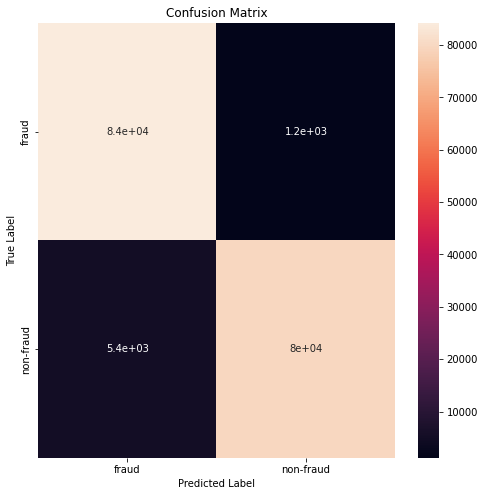


Accuracy  : 0.9617384473793739
Recall    : 0.9370099995305384
Precision : 0.9856784819190835
F1-score  : 0.9607282747997906
ROC AUC   : 0.9617122375705044


In [41]:
# XGBoost after oversampling 
xgboost_on_oversample(df)